In [1]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
import opendatasets as od

In [4]:
od.download('https://www.kaggle.com/datasets/vijayaadithyanvg/car-price-predictionused-cars')

Skipping, found downloaded files in ".\car-price-predictionused-cars" (use force=True to force download)


In [5]:
df = pd.read_csv('car data.csv')

In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], 
                                                    df.iloc[:, -1], 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 185 to 102
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       210 non-null    object 
 1   Year           210 non-null    int64  
 2   Selling_Price  210 non-null    float64
 3   Present_Price  210 non-null    float64
 4   Driven_kms     210 non-null    int64  
 5   Fuel_Type      210 non-null    object 
 6   Selling_type   210 non-null    object 
 7   Transmission   210 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 14.8+ KB


EXPLORING THE VARIOUS CARS IN THE DATASET

In [13]:
X_train["Car_Name"].value_counts()

city                   17
corolla altis          10
brio                    9
verna                   9
grand i10               7
                       ..
Hero  Ignitor Disc      1
Yamaha FZ 16            1
Bajaj Pulsar 135 LS     1
Honda CBR 150           1
Hyosung GT250R          1
Name: Car_Name, Length: 83, dtype: int64

In [14]:
make_train = X_train["Car_Name"].str.split(" ", expand = True)
make_test = X_test["Car_Name"].str.split(" ", expand = True)

In [15]:
X_train["Manufacturer"] = make_train[0]
X_test["Manufacturer"] = make_test[0]

Text(0, 0.5, 'Count of cars')

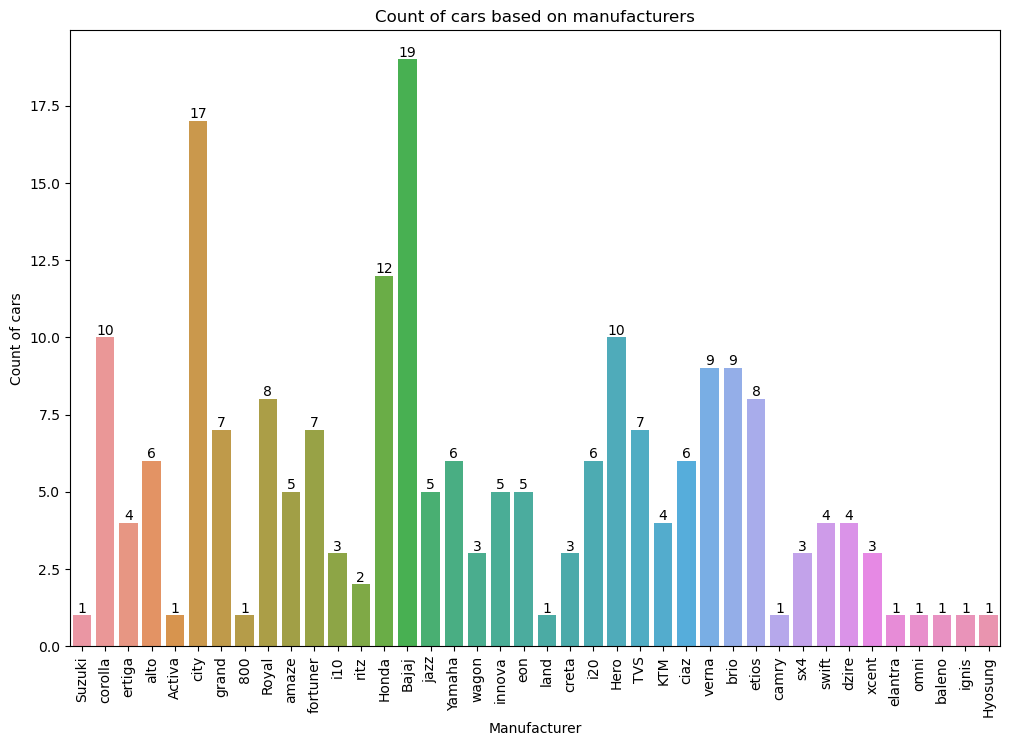

In [16]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Manufacturer', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

MAXIMUM CARS ARE MANUFACTURED BY : BAJAJ

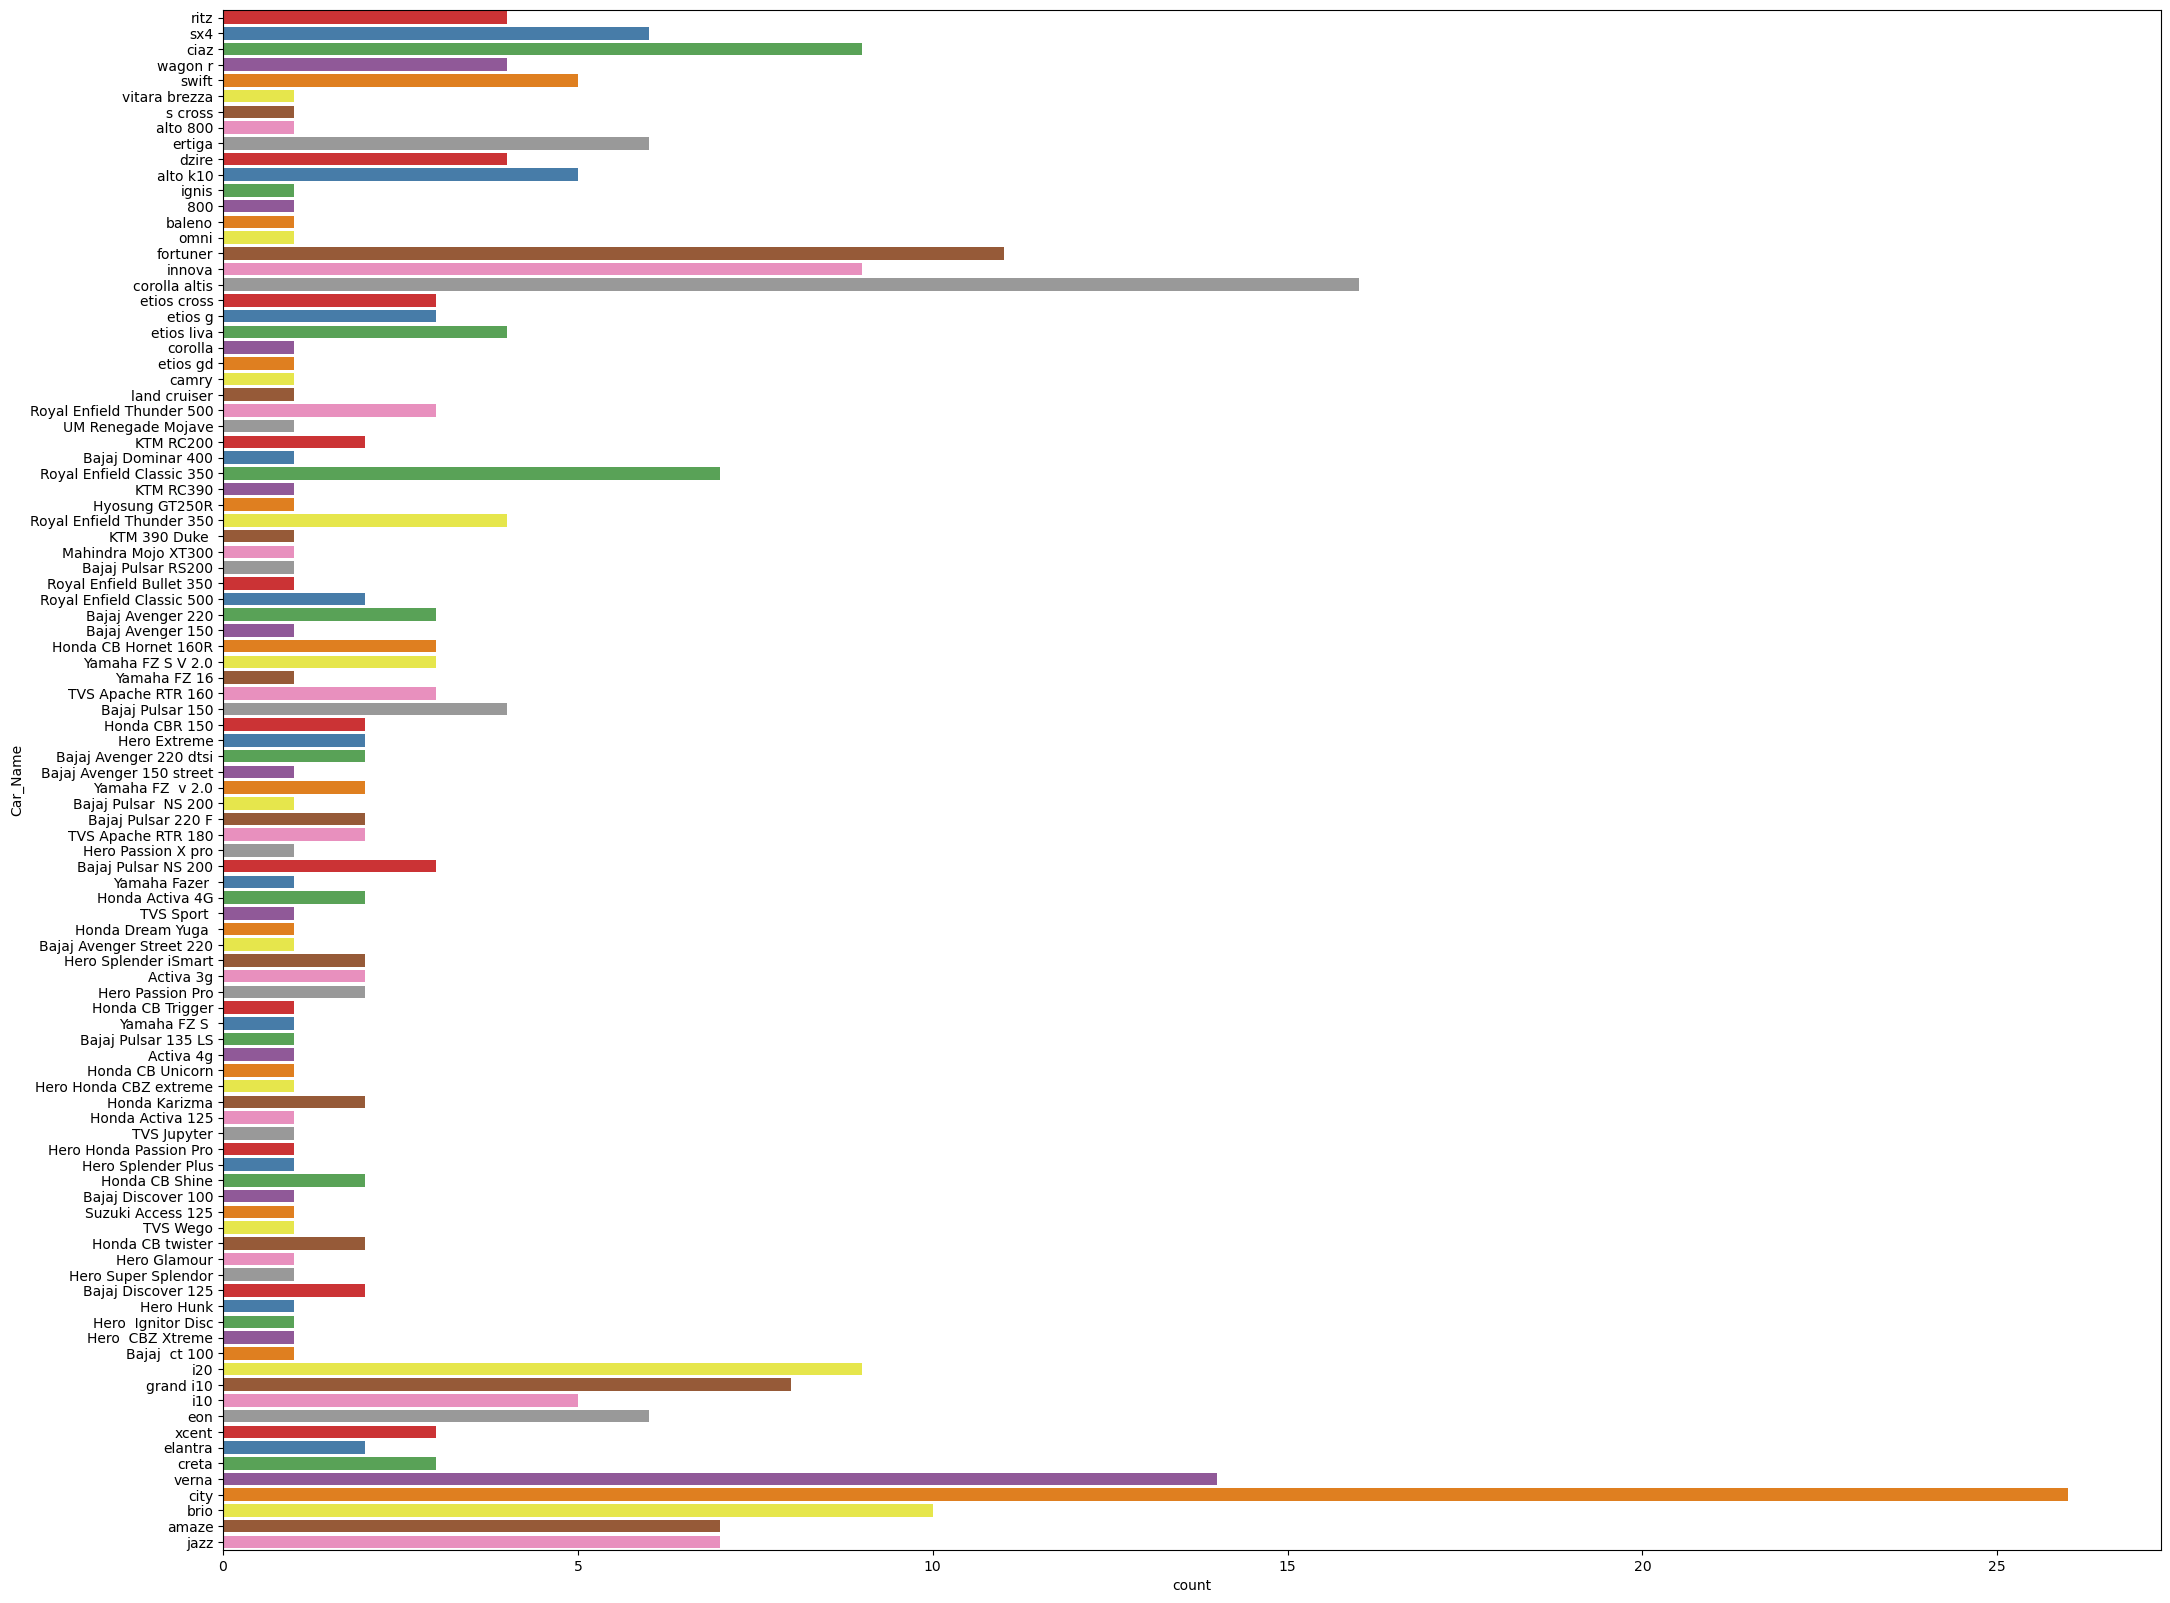

In [20]:
plt.figure(figsize=(25,20))
sns.countplot(y="Car_Name",data=df,palette="Set1")
plt.show()

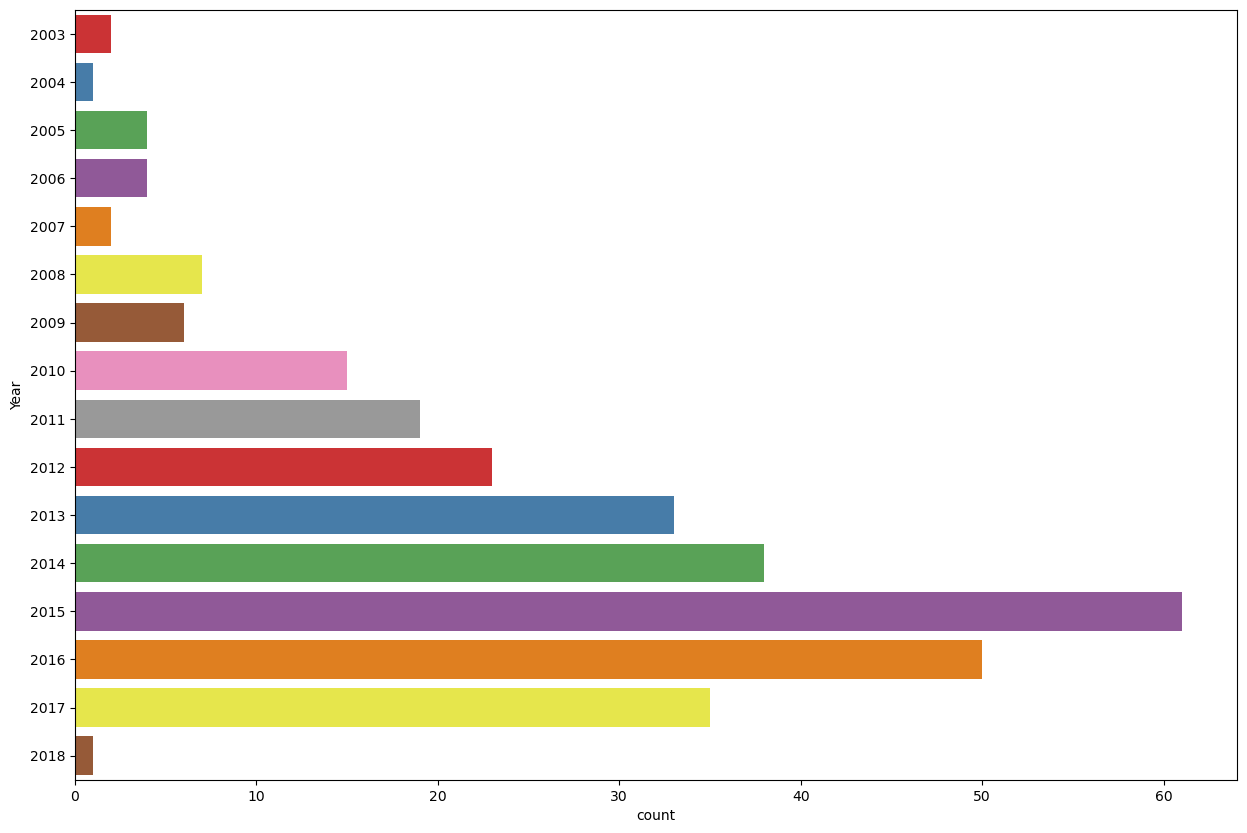

In [21]:
plt.figure(figsize=(15,10))
sns.countplot(y="Year",data=df,palette="Set1")
plt.show()

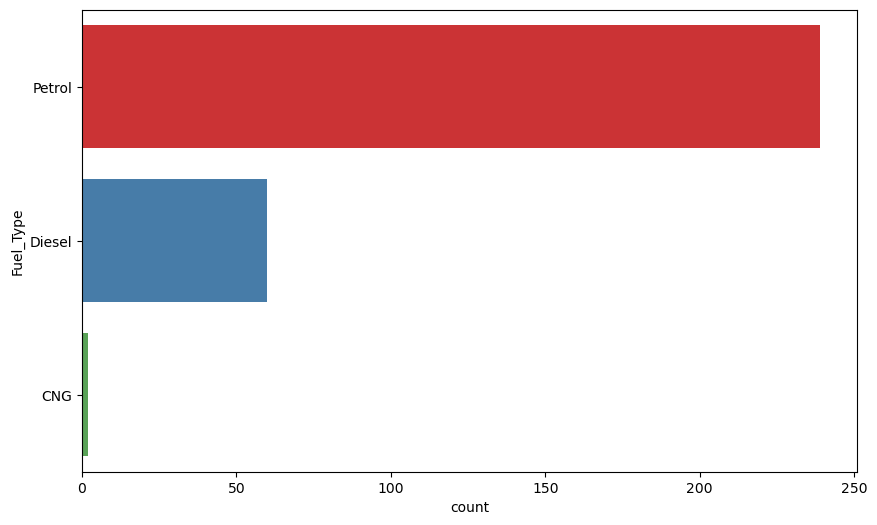

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(y="Fuel_Type",data=df,palette="Set1")
plt.show()

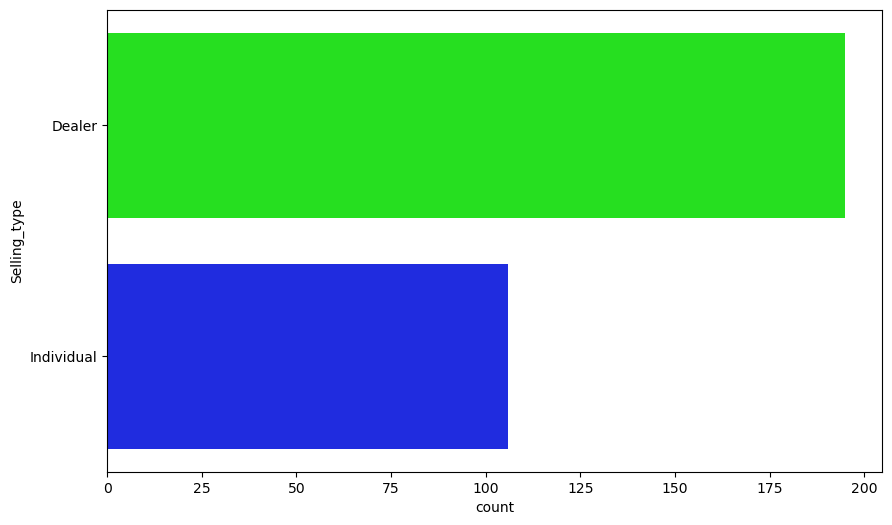

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(y="Selling_type",data=df,palette="hsv")
plt.show()

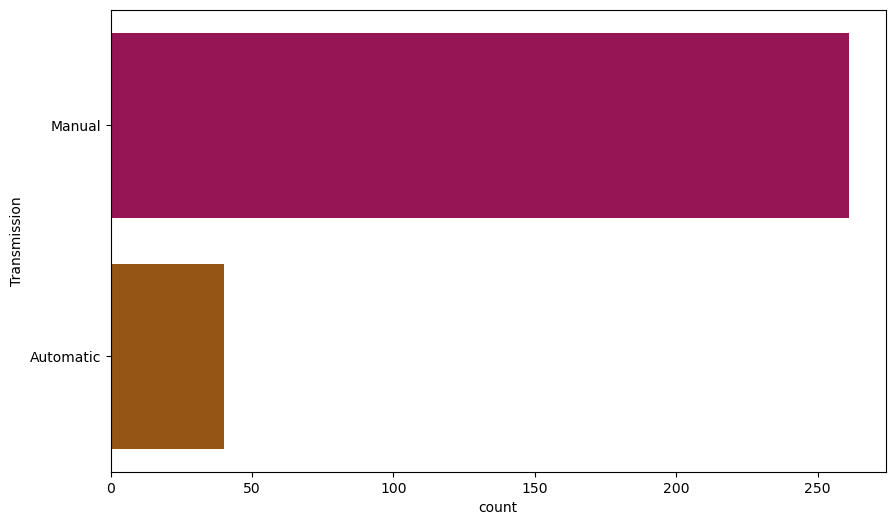

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(y="Transmission",data=df,palette="brg")
plt.show()

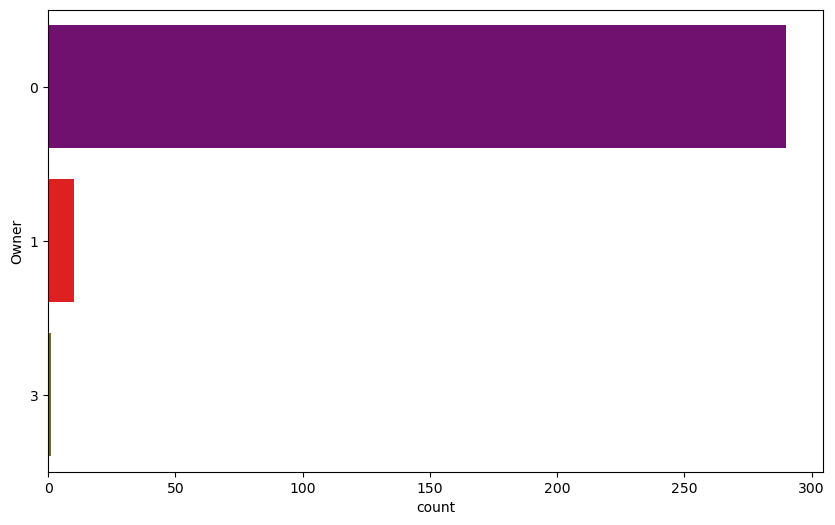

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(y="Owner",data=df,palette="brg")
plt.show()

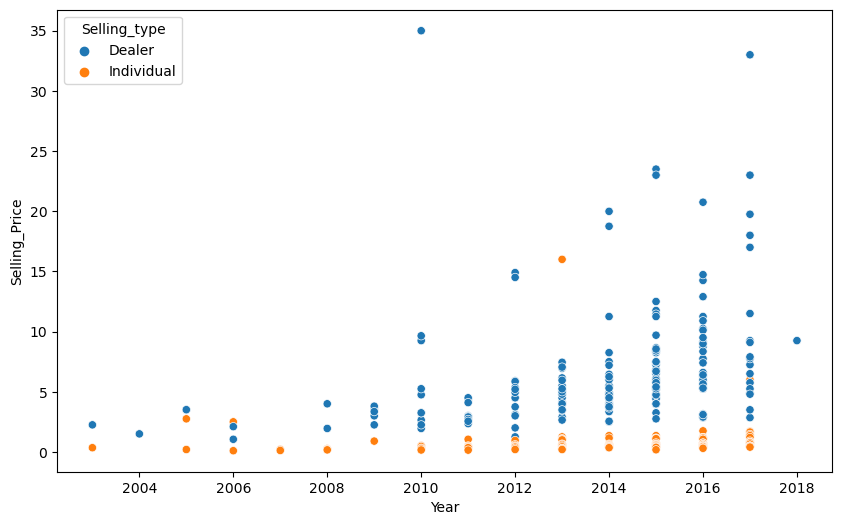

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Year", y="Selling_Price", hue="Selling_type")
plt.show()

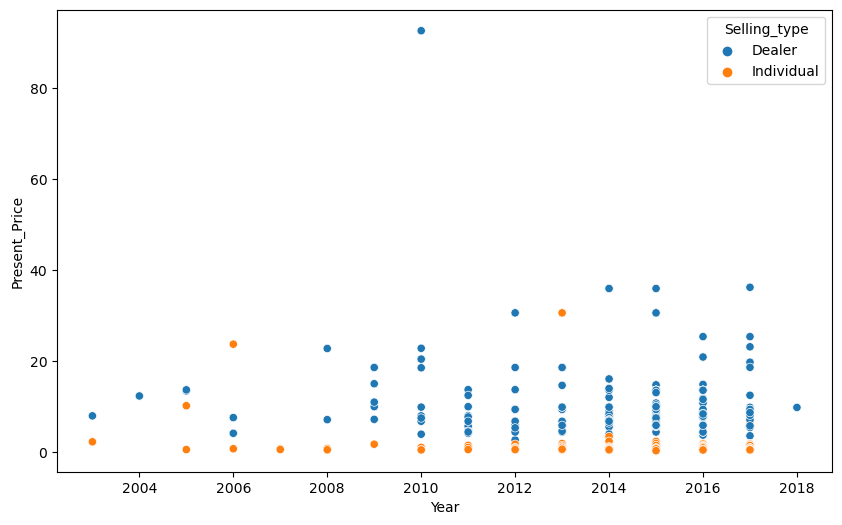

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Year", y="Present_Price", hue="Selling_type")
plt.show()

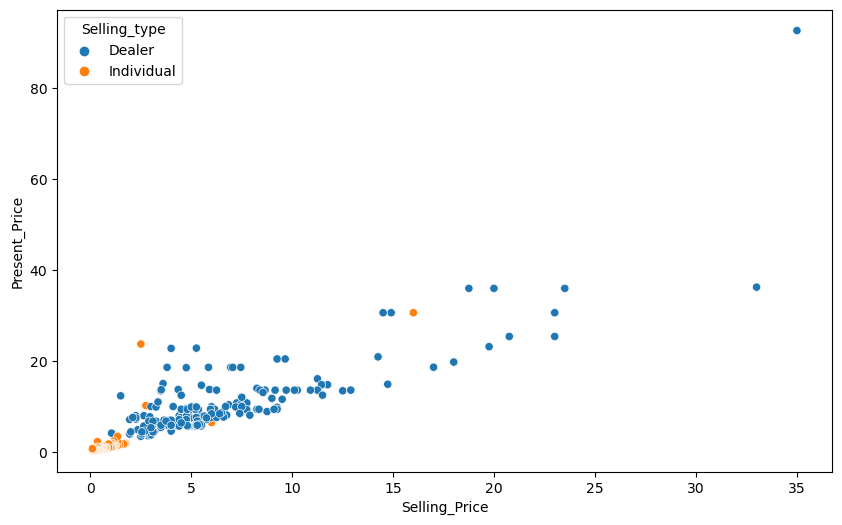

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Selling_Price", y="Present_Price", hue="Selling_type")
plt.show()

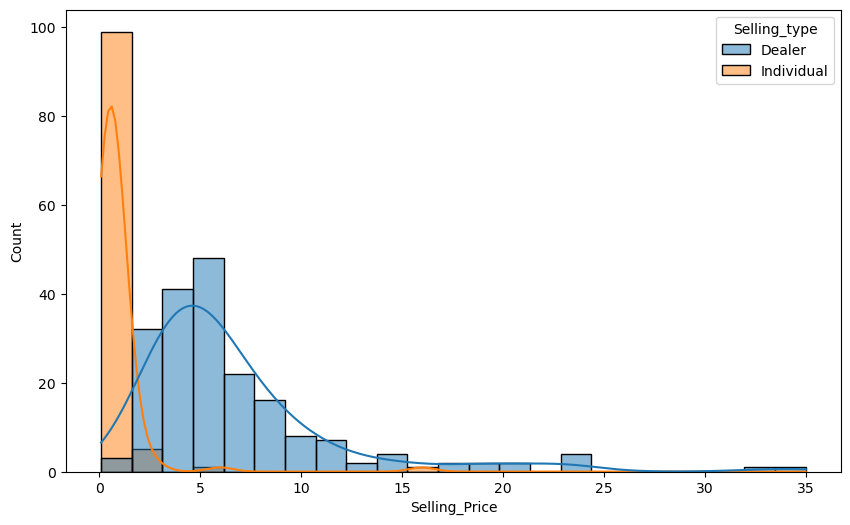

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Selling_Price", kde=True,hue="Selling_type")
plt.show()

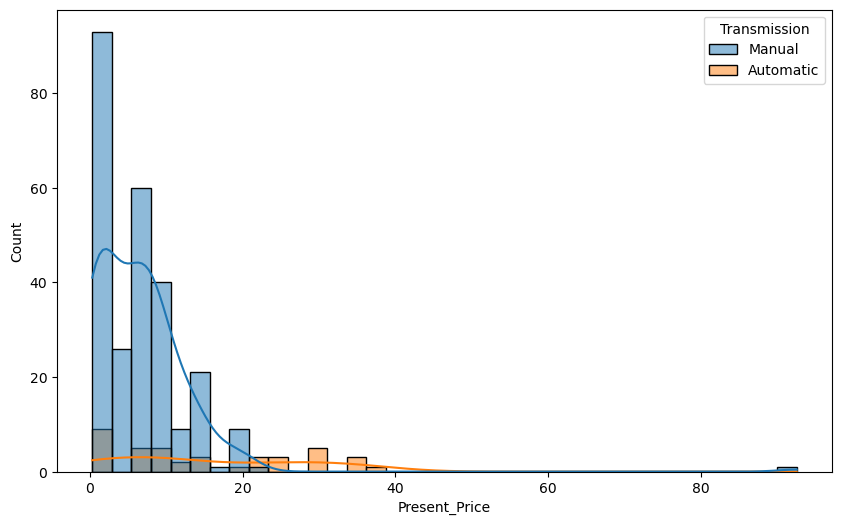

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Present_Price", kde=True,hue="Transmission")
plt.show()

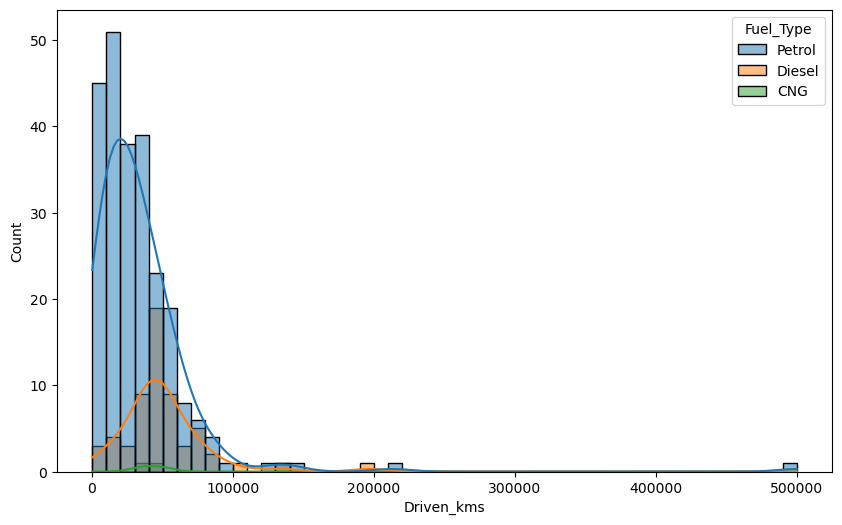

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Driven_kms", kde=True,hue="Fuel_Type")
plt.show()

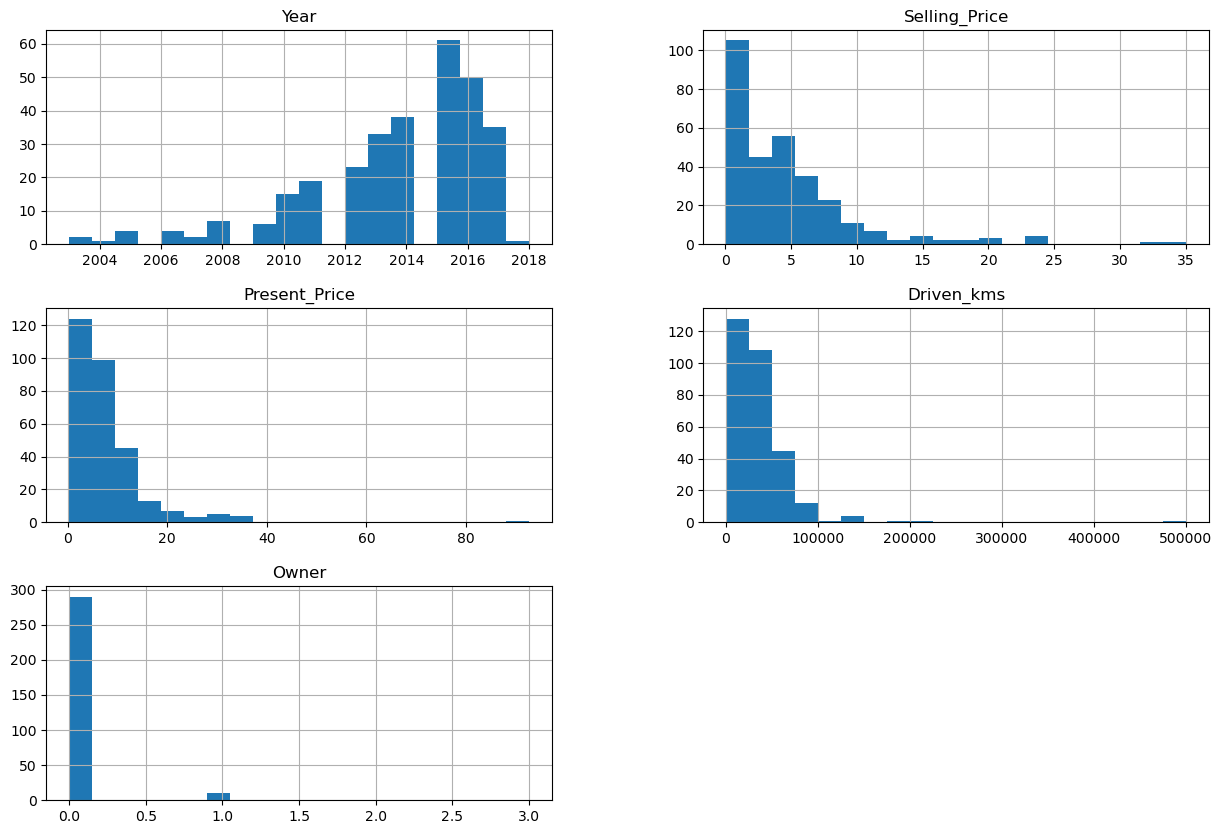

In [37]:
df.hist(bins=20, figsize=(15, 10))
plt.show()

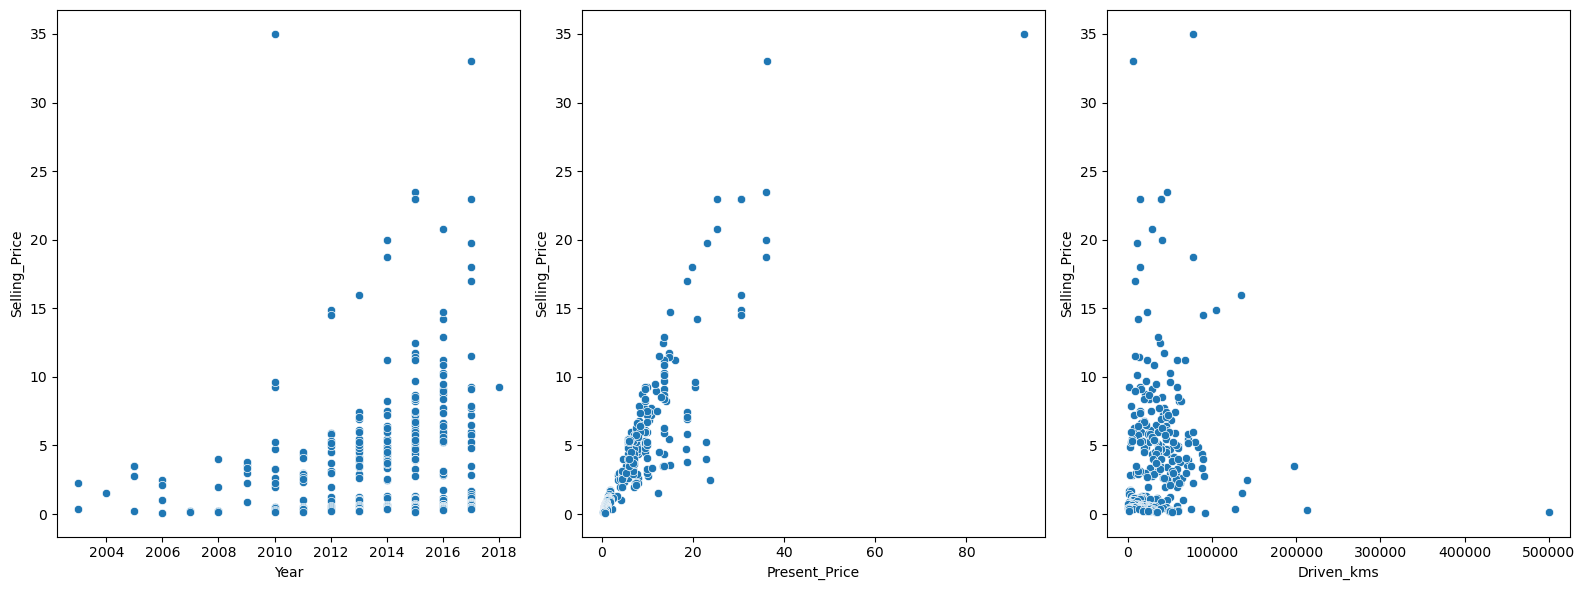

In [38]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x='Year', y='Selling_Price', data=df)
plt.subplot(1, 3, 2)
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.subplot(1, 3, 3)
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df)
plt.tight_layout()
plt.show()

# MODEL BUILDING

In [39]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [40]:
X_encoded = pd.get_dummies(X, columns=['Fuel_Type', 'Selling_type', 'Transmission','Car_Name'], prefix=['Fuel', 'Selling', 'Transmission','Cars'])

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [42]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred_linear = linear_model.predict(X_test)

In [44]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = sqrt(mse_linear)
print(f'Linear Regression RMSE: {rmse_linear}')

Linear Regression RMSE: 1.5125556296316314


In [45]:
#Train a Random Forest Model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [46]:
y_pred_rf = rf_model.predict(X_test)

In [47]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = sqrt(mse_rf)
print(f'Random Forest RMSE: {rmse_rf}')

Random Forest RMSE: 0.8724393833985933


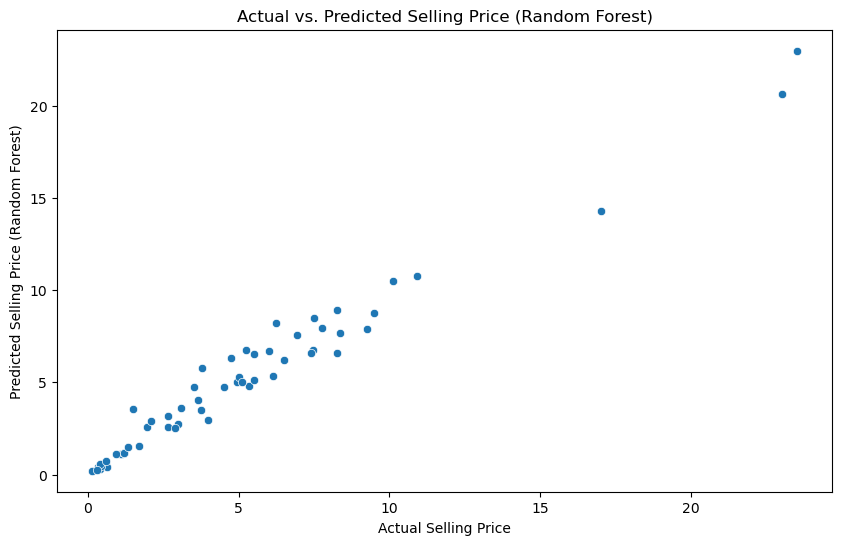

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price (Random Forest)')
plt.title('Actual vs. Predicted Selling Price (Random Forest)')
plt.show()

As wev can see from above scatter plot that datapoints are close to eachother we can say that our model works well.